In [1]:
from fomo.pipelines.train import Learner
from fomo.pipelines.types.learner_args import LearnerArgs
from fomo.utils.data.datasets import DatasetInitializer, PROMPTS
import torch

/home/jupyter/github/fomo/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
NUM_OF_SAMPLES = 16

In [3]:
#TRAIN_SUBSAMPLES = ["base", "all"]
#TRAIN_SUBSAMPLES = ["base"]
TRAIN_SUBSAMPLES = ["base"]
MODEL_TYPE = "clip_transformer_adapter_text"


In [4]:
#DATASETS = ["cifar10", "caltech101", "oxford_pets", "oxford_flowers", "food101", "stanford_cars", "fgvc_aircraft", "dtd", "sun397"]
#DATASETS = ["caltech101", "oxford_pets", "oxford_flowers", "food101", "stanford_cars", "fgvc_aircraft", "dtd", "sun397"]
#DATASETS = ["caltech101", "oxford_pets", "oxford_flowers", "fgvc_aircraft"]
DATASETS = ["cifar10"]

In [6]:
for train_subsample in TRAIN_SUBSAMPLES:
    for dataset_name in DATASETS:
        print(f"Training {MODEL_TYPE} on {dataset_name} on {train_subsample} subsample.")
        
        _dataset = DatasetInitializer.from_str(dataset_name).value(train=True)
        labels = _dataset.labels
        prompt_template = PROMPTS[dataset_name]
        num_of_classes = len(labels) // 2 if train_subsample == "base" else len(labels)
        #num_of_classes = len(labels) - (len(labels) // 5) if train_subsample == "base" else len(labels)
        train_eval_size = [NUM_OF_SAMPLES * num_of_classes, NUM_OF_SAMPLES * num_of_classes]

        learner_args = LearnerArgs(model_type=MODEL_TYPE, dataset=dataset_name)
        learner_args.device = "cuda"
        learner_args.epochs = 200
        learner_args.model_type = MODEL_TYPE
        learner_args.train_eval_size = train_eval_size
        learner_args.text_prompt_template = prompt_template
        learner_args.print_freq = 200
        learner_args.save_freq = 200
        learner_args.learning_rate = 5e-3
        learner_args.use_wandb = False
        learner_args.patience = 5
        learner_args.info = "without text encoder"
        learner_args.batch_size = 256
        learner_args.momentum = 0.5
        learner_args.train_subsample = train_subsample
        learner_args.dataset = dataset_name

        learner = Learner(learner_args)
        learner.run()

Training clip_transformer_adapter_text on cifar10 on base subsample.
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Turning off gradients in both the image and the text encoder
Parameters to be updated: {'adapter.mha.out_proj.bias', 'adapter.downsampler.1.weight', 'adapter.downsampler.0.weight', 'adapter.downsampler.0.bias', 'adapter.upsampler.2.weight', 'adapter.mha.out_proj.weight', 'adapter.upsampler.2.bias', 'adapter.upsampler.0.weight', 'adapter.upsampler.0.bias', 'adapter.mha.in_proj_bias', 'adapter.mha.in_proj_weight', 'adapter.downsampler.1.bias'}
Number of learnable paramms: 107712


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: [0][0/1]	Time  0.633 ( 0.633)	Data  0.342 ( 0.342)	Loss 1.2582e-01 (1.2582e-01)	Acc@1  97.50 ( 97.50)


100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

Validate: [0/1]	Time  0.573 ( 0.573)	Loss 1.2520e-01 (1.2520e-01)	Prompt Acc@1  96.25 ( 96.25)
 * Prompt Acc@1 96.250


saved best file


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: [1][0/1]	Time  0.640 ( 0.640)	Data  0.350 ( 0.350)	Loss 1.1648e-01 (1.1648e-01)	Acc@1  96.25 ( 96.25)


100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

Validate: [0/1]	Time  0.623 ( 0.623)	Loss 1.1516e-01 (1.1516e-01)	Prompt Acc@1  97.50 ( 97.50)
 * Prompt Acc@1 97.500


saved best file


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: [2][0/1]	Time  0.689 ( 0.689)	Data  0.386 ( 0.386)	Loss 1.1326e-01 (1.1326e-01)	Acc@1  95.00 ( 95.00)


100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

Validate: [0/1]	Time  0.620 ( 0.620)	Loss 1.1555e-01 (1.1555e-01)	Prompt Acc@1  97.50 ( 97.50)
 * Prompt Acc@1 97.500


There's no improvement for 1 epochs.


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: [3][0/1]	Time  0.653 ( 0.653)	Data  0.351 ( 0.351)	Loss 1.1061e-01 (1.1061e-01)	Acc@1  95.00 ( 95.00)


100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

Validate: [0/1]	Time  0.620 ( 0.620)	Loss 1.1727e-01 (1.1727e-01)	Prompt Acc@1  97.50 ( 97.50)
 * Prompt Acc@1 97.500


There's no improvement for 2 epochs.


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: [4][0/1]	Time  0.648 ( 0.648)	Data  0.350 ( 0.350)	Loss 1.0871e-01 (1.0871e-01)	Acc@1  95.00 ( 95.00)


100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

Validate: [0/1]	Time  0.621 ( 0.621)	Loss 1.0946e-01 (1.0946e-01)	Prompt Acc@1  97.50 ( 97.50)
 * Prompt Acc@1 97.500


There's no improvement for 3 epochs.


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: [5][0/1]	Time  0.665 ( 0.665)	Data  0.357 ( 0.357)	Loss 1.0547e-01 (1.0547e-01)	Acc@1  95.00 ( 95.00)


100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

Validate: [0/1]	Time  0.615 ( 0.615)	Loss 1.0813e-01 (1.0813e-01)	Prompt Acc@1  97.50 ( 97.50)
 * Prompt Acc@1 97.500


There's no improvement for 4 epochs.


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: [6][0/1]	Time  0.657 ( 0.657)	Data  0.349 ( 0.349)	Loss 1.0323e-01 (1.0323e-01)	Acc@1  95.00 ( 95.00)


100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

Validate: [0/1]	Time  0.623 ( 0.623)	Loss 1.1543e-01 (1.1543e-01)	Prompt Acc@1  97.50 ( 97.50)
 * Prompt Acc@1 97.500


There's no improvement for 5 epochs.
The training halted by early stopping criterion.
Files already downloaded and verified


  2%|▎         | 1/40 [00:02<01:42,  2.62s/it]

Validate: [ 0/40]	Time  2.621 ( 2.621)	Loss 3.6415e-01 (3.6415e-01)	Prompt Acc@1  87.89 ( 87.89)


100%|██████████| 40/40 [00:36<00:00,  1.08it/s]


 * Prompt Acc@1 90.710
Files already downloaded and verified


  5%|▌         | 1/20 [00:02<00:45,  2.41s/it]

Validate: [ 0/20]	Time  2.405 ( 2.405)	Loss 1.3930e-01 (1.3930e-01)	Prompt Acc@1  95.31 ( 95.31)


100%|██████████| 20/20 [00:19<00:00,  1.01it/s]


 * Prompt Acc@1 96.100
Files already downloaded and verified


  5%|▌         | 1/20 [00:02<00:46,  2.45s/it]

Validate: [ 0/20]	Time  2.453 ( 2.453)	Loss 1.3046e-01 (1.3046e-01)	Prompt Acc@1  95.31 ( 95.31)


100%|██████████| 20/20 [00:19<00:00,  1.04it/s]

 * Prompt Acc@1 95.500


In [7]:
from PIL import Image
from fomo.pipelines.utils.utils import (
    build_label_prompts
)

img = Image.open("plane.jpg")

In [8]:
learner.model.precompute_prompt_features(
        build_label_prompts(learner.train_labels, learner._lr_args.text_prompt_template)
)

In [9]:
text_embeddings = learner.model._precomputed_prompt_features

In [10]:
with torch.no_grad():
    img_t = learner.model.transform(img).to(torch.device("cuda")).to(torch.float16).view(1, 3, 224, 224)
    out = learner.model._clip.visual(img_t)
    
out_base = torch.concat([text_embeddings, out])

In [11]:
with torch.no_grad():
    out_mha = learner.model.adapter(out_base.unsqueeze(0).to(torch.float32)).squeeze(0)

In [12]:
out_mha.shape

torch.Size([6, 512])

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

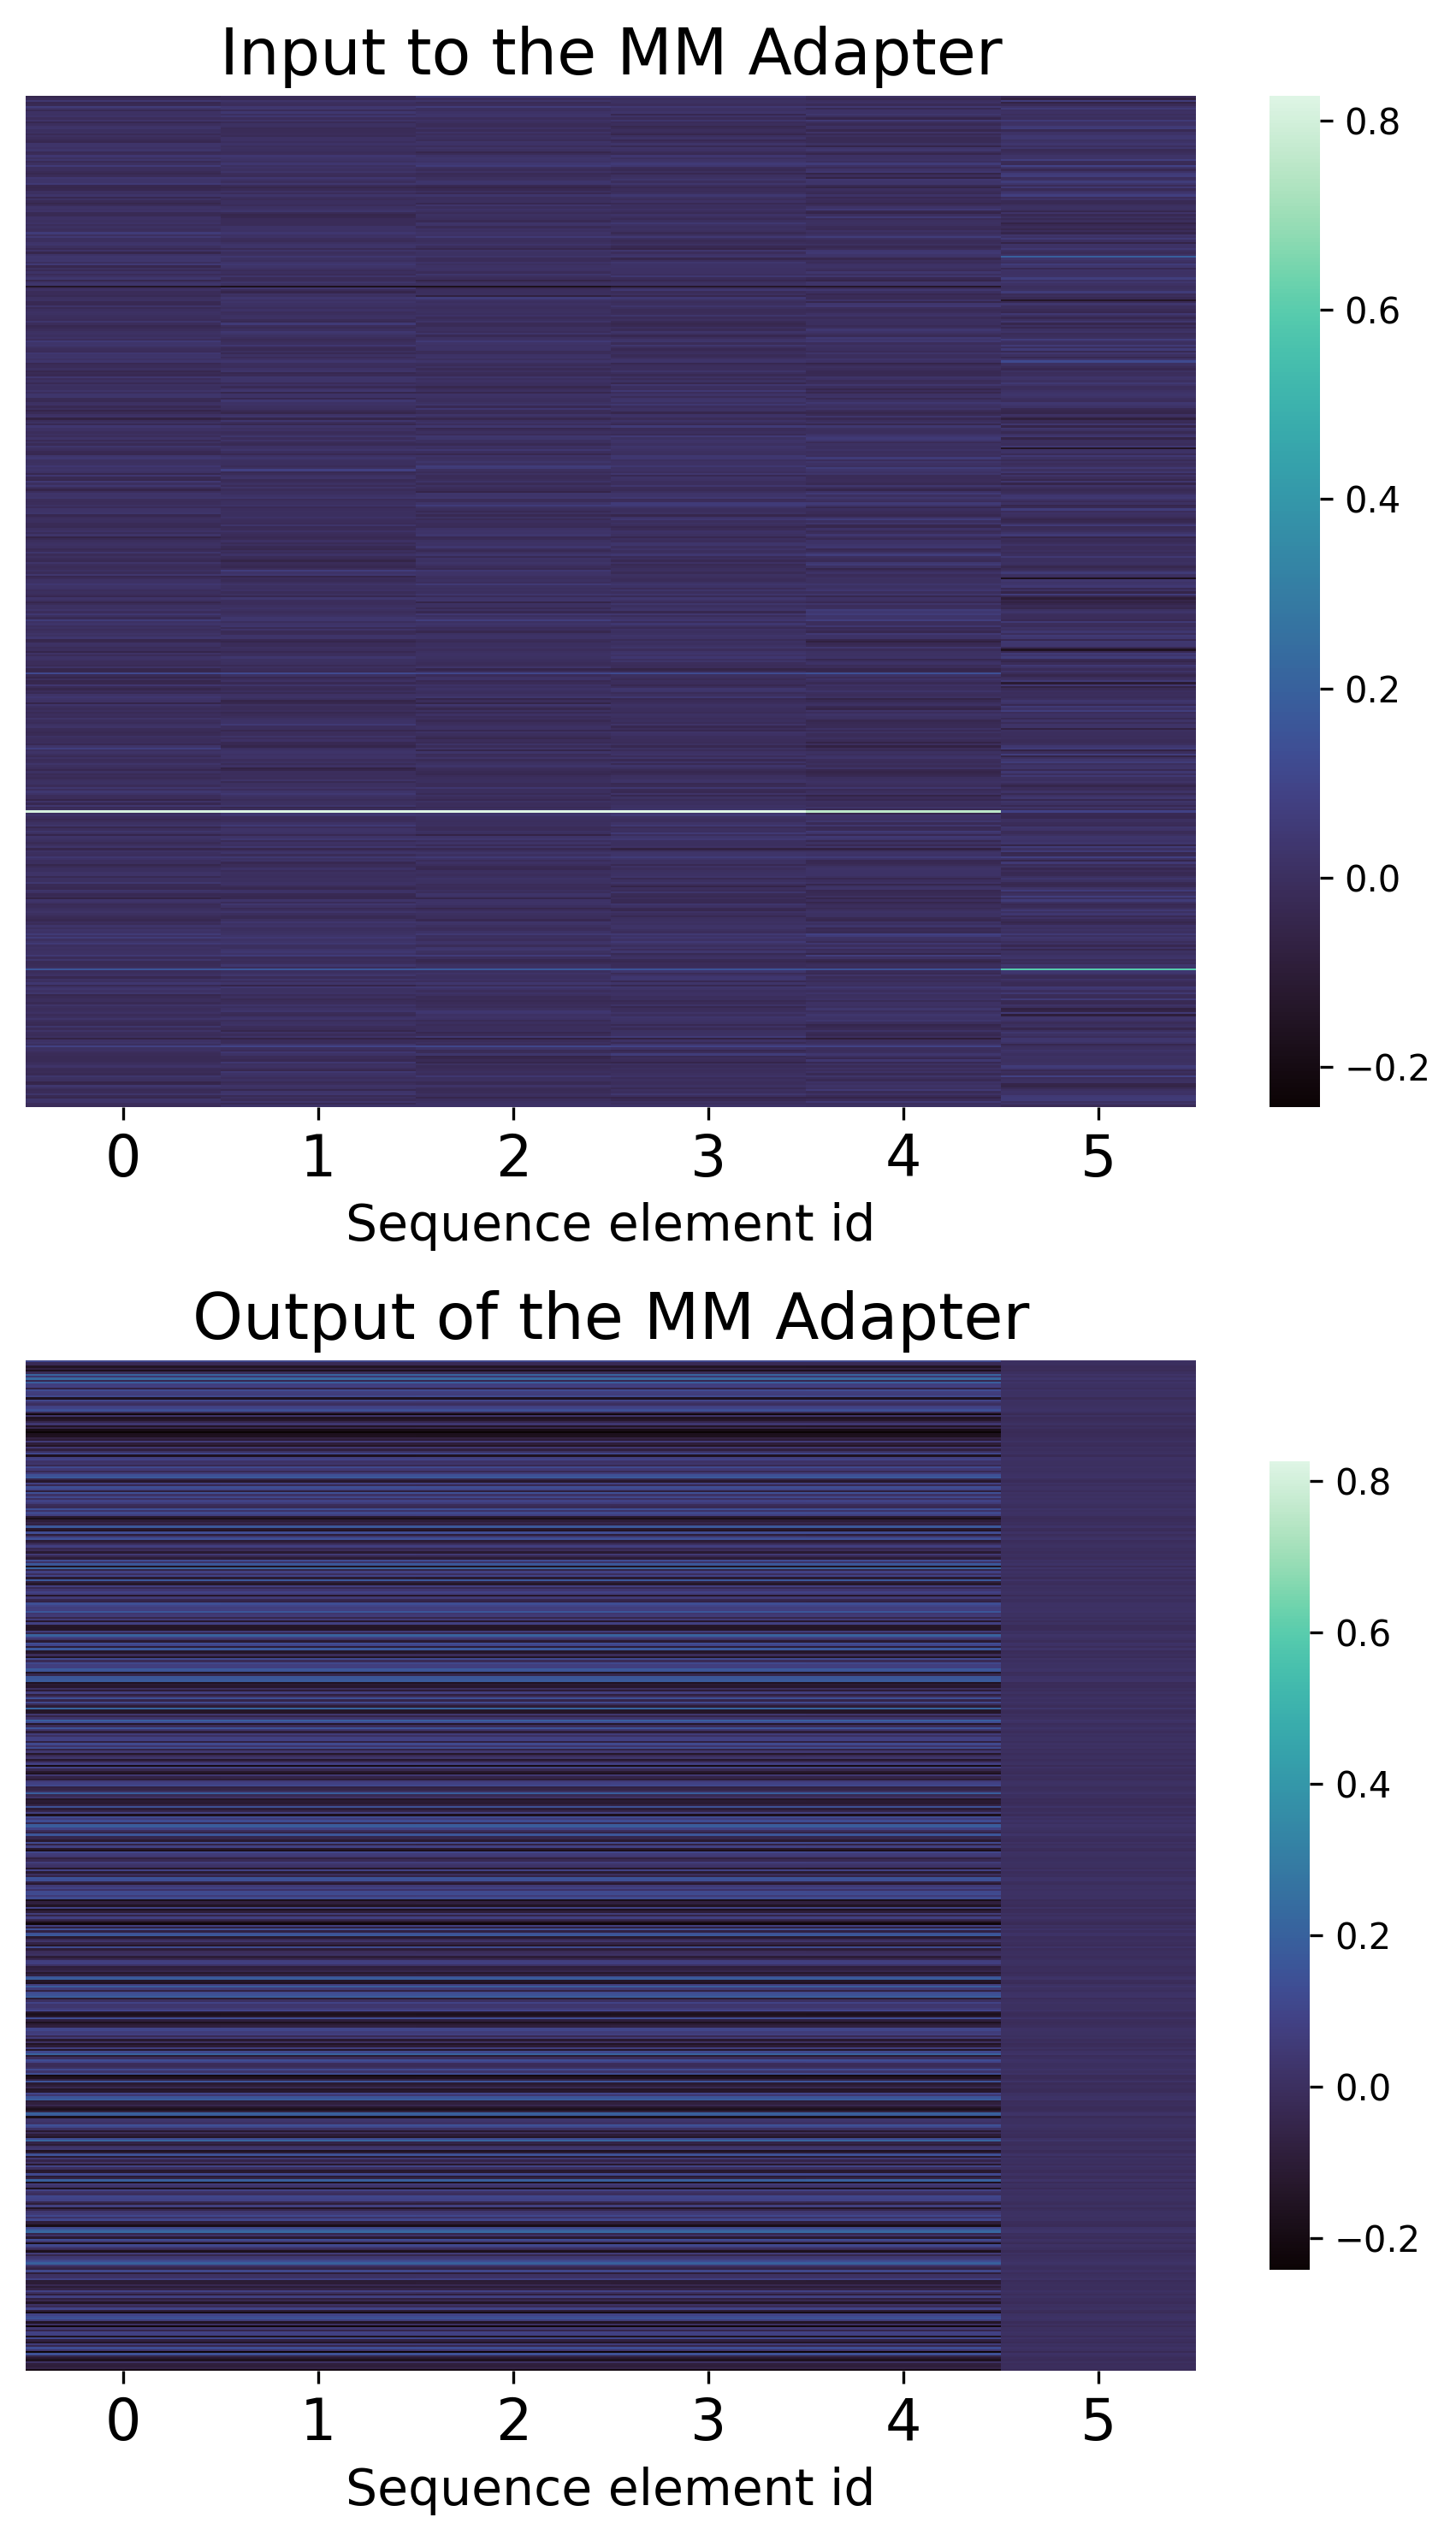

In [26]:
# Normalize the tensors
norm_base = out_base.norm(dim=-1, keepdim=True)
out_base_norm = (out_base / norm_base).cpu().numpy().T
out_mha_norm = (out_mha / norm_base).cpu().numpy().T

# Determine common color scale limits
vmin = min(out_base_norm.min(), out_mha_norm.min())
vmax = max(out_base_norm.max(), out_mha_norm.max())

# Set font sizes
title_size = 18  # Title font size
label_size = 16  # Axis label font size
tick_size = 16  # Tick label font size

# Create a figure with 1x2 subplots, adjusting the size to accommodate larger fonts
fig, axs = plt.subplots(2, 1, figsize=(6, 10), dpi=300)

# Plot the first heatmap (out_base_norm) without the color bar
sns.heatmap(out_base_norm, cmap="mako", ax=axs[0], vmin=vmin, vmax=vmax, cbar=True, )
axs[0].set_title('Input to the MM Adapter', fontsize=title_size)
axs[0].tick_params(axis='x', labelsize=tick_size)
axs[0].tick_params(axis='y', labelsize=tick_size)

# Plot the second heatmap (out_mha_norm) with the color bar
sns.heatmap(out_mha_norm, cmap="mako", ax=axs[1], vmin=vmin, vmax=vmax, cbar=True, cbar_kws={"shrink": 0.8})
axs[1].set_title('Output of the MM Adapter', fontsize=title_size)
axs[1].tick_params(axis='x', labelsize=tick_size)
axs[1].tick_params(axis='y', labelsize=tick_size)
axs[1].set_yticks([])
axs[1].set_yticklabels([])
axs[0].set_yticks([])
axs[0].set_yticklabels([])

axs[0].set_xlabel("Sequence element id", fontsize=14)
axs[1].set_xlabel("Sequence element id", fontsize=14)

# Optionally, you can remove the y-axis label
axs[1].set_ylabel('')
axs[0].set_ylabel('')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.savefig("heatmap.pdf")